# UNAD
## Luis Alberto Salcedo Salas,
### Mall Customer Data - K Means
    
__Pasos de la actividad__

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
1. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
1. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
1. Entrenar el modelo configurando los diferentes hiperparámetros
1. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
1. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
1. Interpretar, analizar y documentar los resultados obtenidos

In [49]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

from sklearn.preprocessing import StandardScaler # Normalización de datos
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

### Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [3]:
# Carga y lectura de datos

Data = pd.read_csv('D:/Documentos/Universidad. Ing Sistemas/10 - Semestre/Análisis de datos/Tarea 4/Mall_Customers.csv')
Data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Verificación de los datos generales del dataset

Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# Información del formato de la tabla

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


### Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [6]:
#Se elimina la columna CustomerID que no es relevante para el aprendizaje

Data = Data.drop(['CustomerID'], axis = 1)

In [10]:
# Se modifica el dataset para que valores Male sean iguales a 0 y valores Female sean iguales a 1 en la columna Gender

genderValues = Data['Gender'].value_counts()
print(genderValues)

Gender
Female    112
Male       88
Name: count, dtype: int64


In [11]:
Data['Gender'] = Data['Gender'].map({ 'Male': 0, 'Female': 1 })
genderValues = Data['Gender'].value_counts()
print(genderValues)

Gender
1    112
0     88
Name: count, dtype: int64


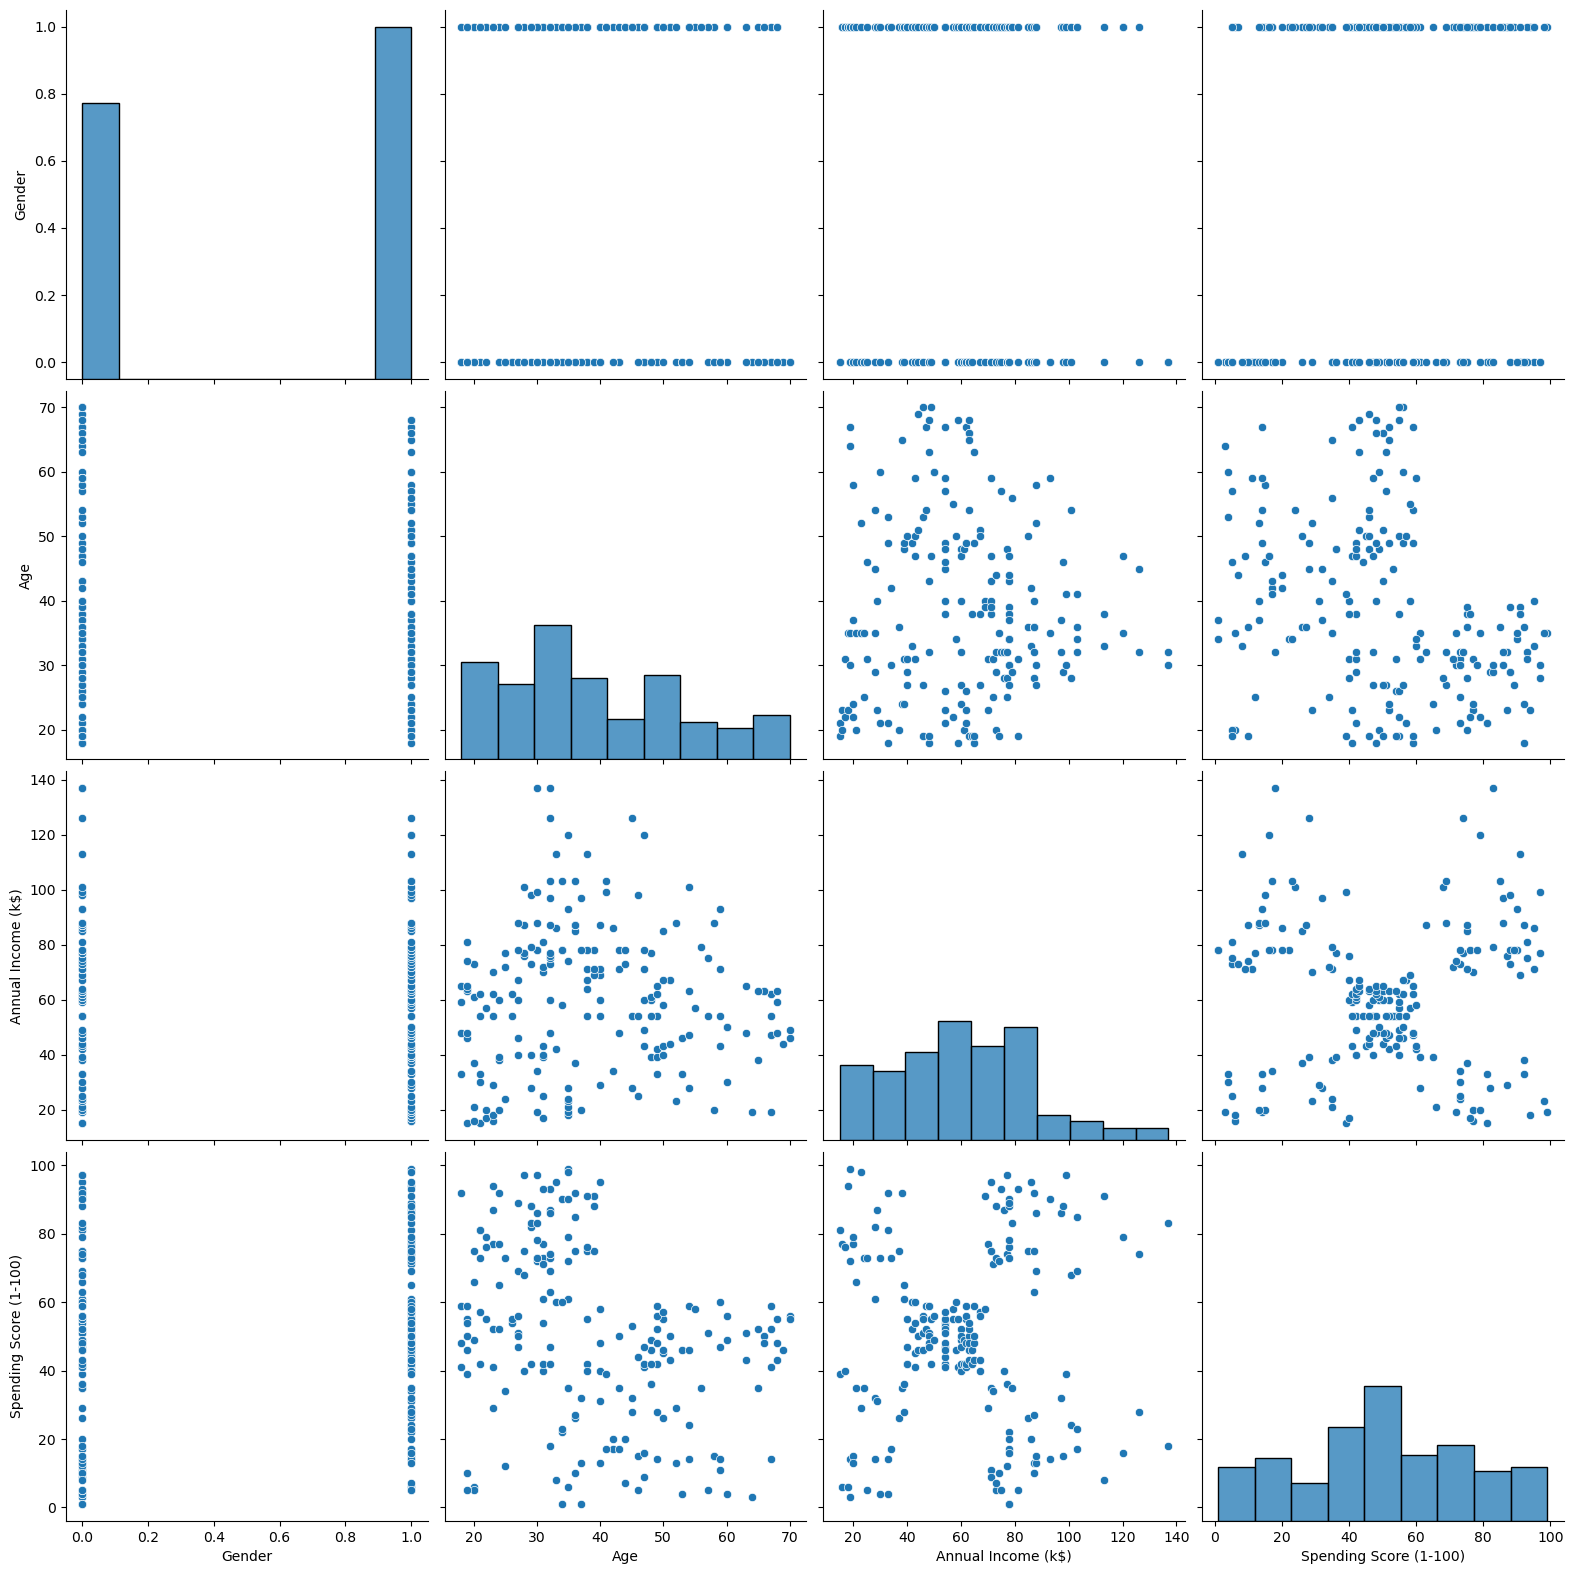

In [12]:
# Implementación de gráficos de dispersión en relación con los parámetros

sns.pairplot(Data, size=4,kind='scatter')

In [13]:
# Verificación numérica de correlación entre variables - Matriz de correlación

corr_matrix = Data.corr()
corr_matrix

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


Text(0.5, 1.0, 'IBox Plot Age')

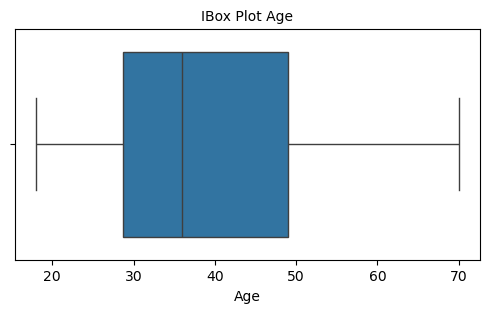

In [19]:
# Verificación de datos atípicos con diagrama de barras

plt.figure(figsize = (6, 3))
sns.boxplot(x = Data['Age'])
plt.title('IBox Plot Age', fontsize = 10 )

Text(0.5, 1.0, 'IBox Plot Annual Income (k$)')

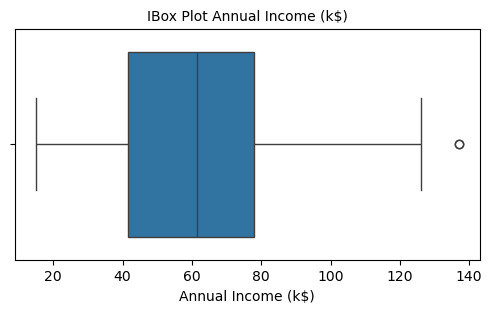

In [18]:
# Verificación de datos atípicos con diagrama de barras

plt.figure(figsize = (6, 3))
sns.boxplot(x = Data['Annual Income (k$)'])
plt.title('IBox Plot Annual Income (k$)', fontsize = 10)

Text(0.5, 1.0, 'IBox Plot Spending Score (1-100)')

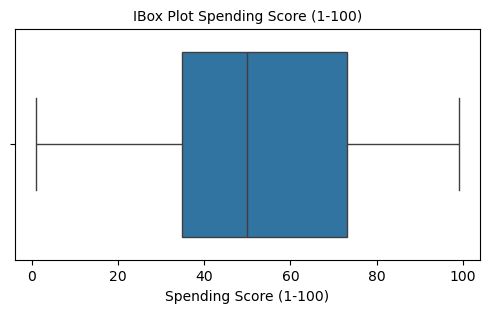

In [20]:
# Verificación de datos atípicos con diagrama de barras

plt.figure(figsize = (6, 3))
sns.boxplot(x = Data['Spending Score (1-100)'])
plt.title('IBox Plot Spending Score (1-100)', fontsize = 10)

In [21]:
# Estandarización de datos

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(Data), columns = Data.columns)
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.886405,-0.276302,2.268791,1.118061
196,0.886405,0.441365,2.497807,-0.861839
197,-1.128152,-0.491602,2.497807,0.923953
198,-1.128152,-0.491602,2.917671,-1.250054


# K Means
### Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

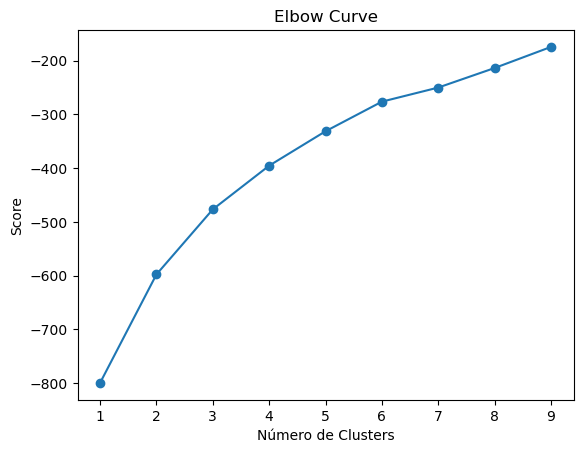

In [28]:
# Evaluación del Score para determinar el valor óptimo de K Centroides

Nc = range(1, 10)
kmeans = [KMeans(n_clusters = i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Entrenar el modelo configurando los diferentes hiperparámetros
### Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [35]:
# Dado al resultado anterior se evaluarán las métricas de K = { 5, 6, 7, 8 } y así se modelará aquellos que tengan los mejores resultados

kmeans_five = KMeans(n_clusters = 5).fit(X)
kmeans_six = KMeans(n_clusters = 6).fit(X)
kmeans_seven = KMeans(n_clusters = 7).fit(X)
kmeans_eight = KMeans(n_clusters = 8).fit(X)

labels_five = kmeans_five.labels_
labels_six = kmeans_six.labels_
labels_seven = kmeans_seven.labels_
labels_eight = kmeans_eight.labels_

sil_five = metrics.silhouette_score(X, labels_five)
sil_six = metrics.silhouette_score(X, labels_six)
sil_seven = metrics.silhouette_score(X, labels_seven)
sil_eight = metrics.silhouette_score(X, labels_eight)

chIndex_five = metrics.calinski_harabasz_score(X, labels_five)
chIndex_six = metrics.calinski_harabasz_score(X, labels_six)
chIndex_seven = metrics.calinski_harabasz_score(X, labels_seven)
chIndex_eight = metrics.calinski_harabasz_score(X, labels_eight)

dbIndex_five = metrics.davies_bouldin_score(X, labels_five)
dbIndex_six = metrics.davies_bouldin_score(X, labels_six)
dbIndex_seven = metrics.davies_bouldin_score(X, labels_seven)
dbIndex_eight = metrics.davies_bouldin_score(X, labels_eight)

df = pd.DataFrame({
    'K Clusters': [5, 6, 7, 8],
    'Puntaje de Silueta': [sil_five, sil_six, sil_seven, sil_eight],
    'Índice de Calinski-Harabasz': [chIndex_five, chIndex_six, chIndex_seven, chIndex_eight],
    'Inertia': [kmeans_five.inertia_, kmeans_six.inertia_, kmeans_seven.inertia_, kmeans_eight.inertia_],
    'Davies-Bouldin Index': [dbIndex_five, dbIndex_six, dbIndex_seven, dbIndex_eight]
})

print (df)

   K Clusters  Puntaje de Silueta  Índice de Calinski-Harabasz     Inertia  \
0           5            0.311311                    67.901781  334.328372   
1           6            0.310525                    65.021328  298.975178   
2           7            0.292654                    61.509613  274.704904   
3           8            0.367970                    75.586463  213.006357   

   Davies-Bouldin Index  
0              1.153779  
1              1.100229  
2              1.094740  
3              0.951845  


Con base a los datos anteriores identificamos que:

1. Puntaje de Silueta (más cercano a uno): K Clusters 8
1. Índice de Calinski-Harabasz (Más alto): K Clusters 8
1. Inertia (Más bajo): K Clusters 8
1. Davies-Bouldin Index (Más bajo): K Clusters 8

Se selecciona **K = 8** para obtener mejores resultados.

### Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [50]:
# Establecemos colores para asignar a cada centroide y visualizar los gráficos

colores = ['red', 'green', 'cyan', 'yellow', 'blue', 'black', 'grey', 'purple']
asignar = []
for row in labels_eight:
    asignar.append(colores[row])


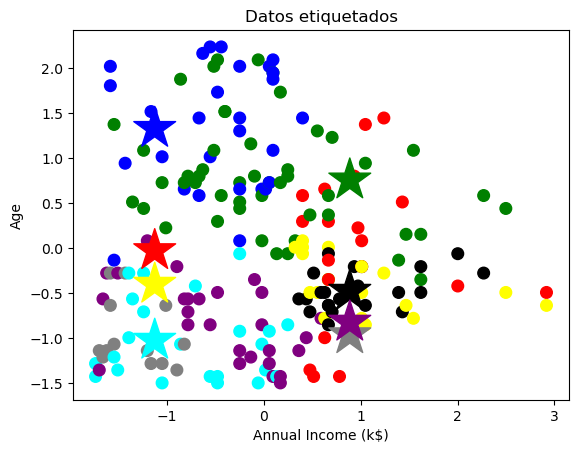

In [52]:
# Gráfico Annual Income (k$) & Age

f1 = X['Annual Income (k$)'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

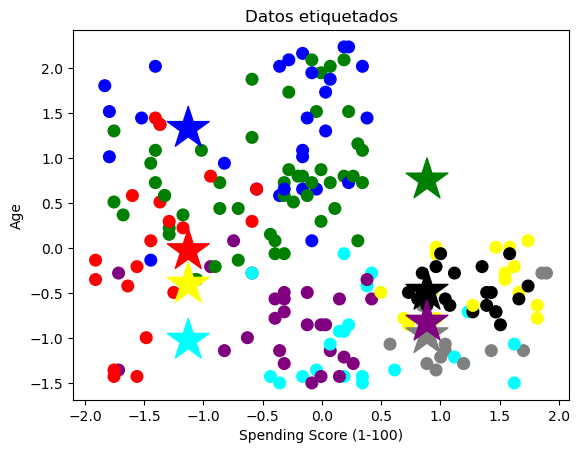

In [53]:
# Gráfico Spending Score (1-100) & Age

f1 = X['Spending Score (1-100)'].values
f2 = X['Age'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Age')
plt.show()

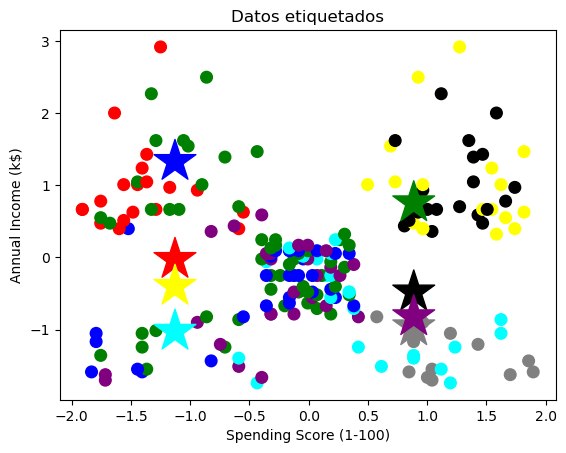

In [42]:
# Gráfico Spending Score (1-100) & Annual Income (k$)

f1 = X['Spending Score (1-100)'].values
f2 = X['Annual Income (k$)'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.title('Datos etiquetados')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [44]:
# Se efecúa una predicción en el sistema

X_new = scaler.fit_transform(np.array([[ 0, 25, 20, 67 ]]))  
new_label = kmeans_eight.predict(X_new)
color=[]
for row in new_label:
    color.append(colores[row])    
print(new_label)
print(color)

[1]
['green']


### Interpretar, analizar y documentar los resultados obtenidos

Se realiza el proceso de aprendizaje no supervisado con el modelo K means. Conforme a lo que se puede evidenciar en todo el proceso, se selecciona un valor **K = 8** que era el que brindaba los mejores resultados en las diversas métricas, sin embargo, es importante resaltar que el mayor coeficiente de silueta es del **0.37** lo cual es una valor bajo que no brinda mayor confiabilidad. Esto se puede soportar a través de la matriz de correlación y las gráficas de dispersión que evidencian una gran variabilibidad entre datos con poca correlación entre los mismos.

A su vez, esto se evidencia en las gráficas del modelo K means donde valores con diferentes colores se encuentran alejados de su centroide y demonstrando poca cohesión en los clusters.